In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')

# Зависимость стоимости билета пассажира от пола

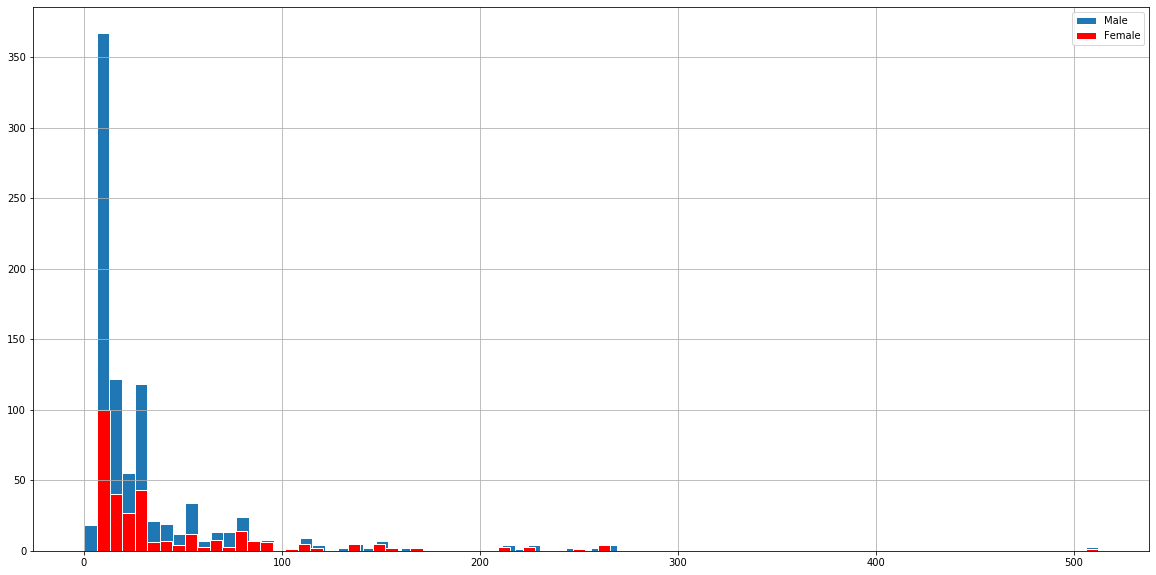

In [157]:
first = data['Fare'].hist(figsize = (20, 10), bins = 80, edgecolor = 'white', grid = True)
data[data['Sex'] == 'female']['Fare'].hist(figsize = (20, 10), bins = 80, edgecolor = 'white', grid = True, color = 'red')
first.legend(['Male', 'Female'])

Женщины покупали по такой же цене, как и мужчины

# Могли ли Роза и Джейк выжить, как пассажиры 1 и 3-го класса соотвественно?

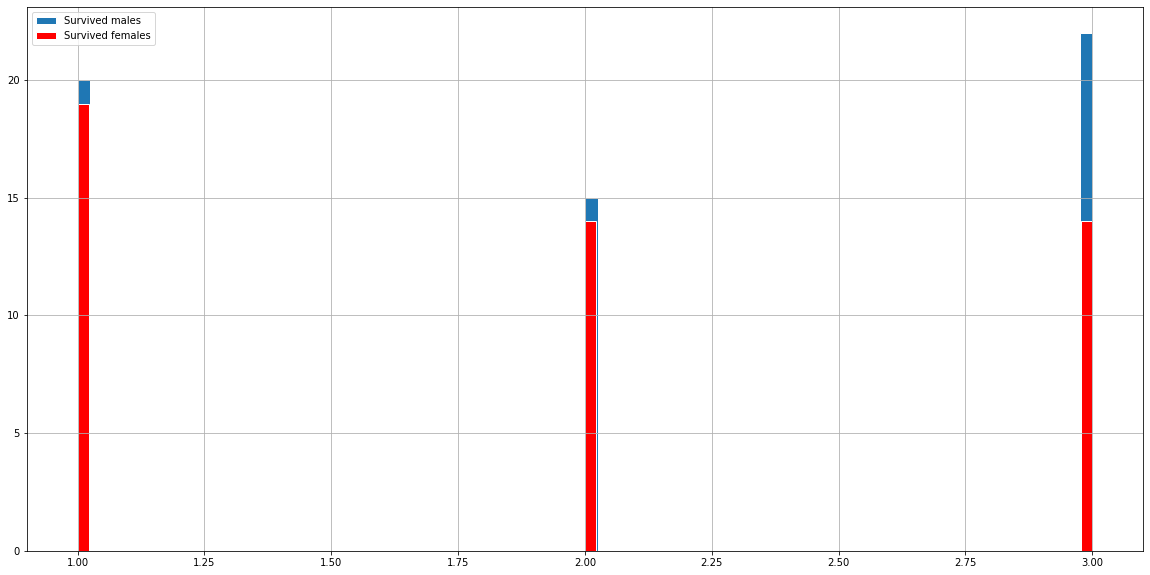

In [66]:
second = data[(data['Survived'] == 1) & (data.Age > 17) & (data.Age < 25)].Pclass.hist(figsize=(20, 10), bins=80, edgecolor='white')
data[(data['Survived'] == 1) & (data['Sex'] == 'female') & (data.Age > 17) & (data.Age < 25)].Pclass.hist(figsize=(20, 10), bins=90, edgecolor='white', color = 'red')
second.legend(['Survived males', 'Survived females'])

Таким образом, грубой оценкой можно сказать, что 19/20 * 8/22 * 100% =  35% у них был шанс встретиться

# Фамилии, начинающиеся с какой буквы, самые счастиливые?


In [81]:
data['Name'] = data['Name'].astype(str).str[0]

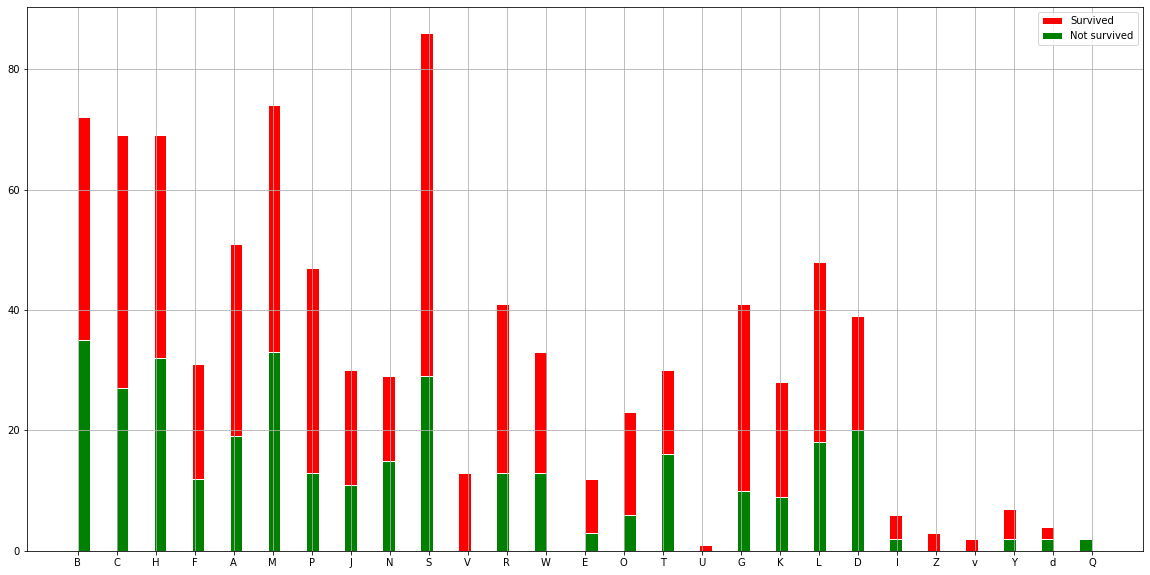

In [132]:
third = data['Name'].hist(figsize=(20, 10), bins=80, edgecolor='white', color = 'red', grid = True)
data[data['Survived'] == 1]['Name'].hist(figsize=(20, 10), bins=80, edgecolor='white', color = 'green', grid = True)

third.legend(['Survived', 'Not survived'])


Таким образом, Больше всего выжило людей с фамилией на Q B,H меньше всего: на U, V, Z

# Средняя стоимость билета от порта, где сели

In [142]:
data.groupby(['Embarked'])['Fare'].sum() / data.groupby(['Embarked'])['Fare'].count()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

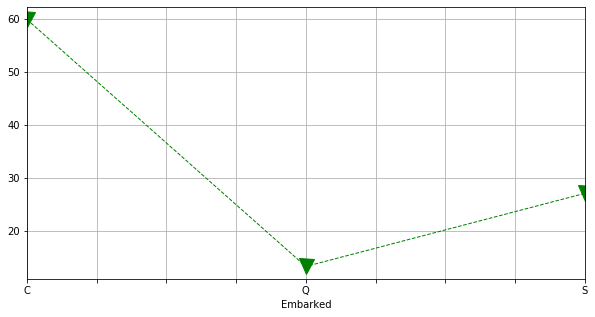

In [156]:
series = data.groupby(['Embarked'])['Fare'].sum() / data.groupby(['Embarked'])['Fare'].count()
series.plot(figsize=(10, 5), linestyle='--', marker='v', markersize=15, grid=True, lw = 1, color = 'green')

Самый дешевые билеты были в порту Q, когда самые дорогие  - в C

# Соотношение спасенных одиноких людей по сравнению с семейными

In [159]:
data['Family'] = data['Parch'] + data['SibSp']

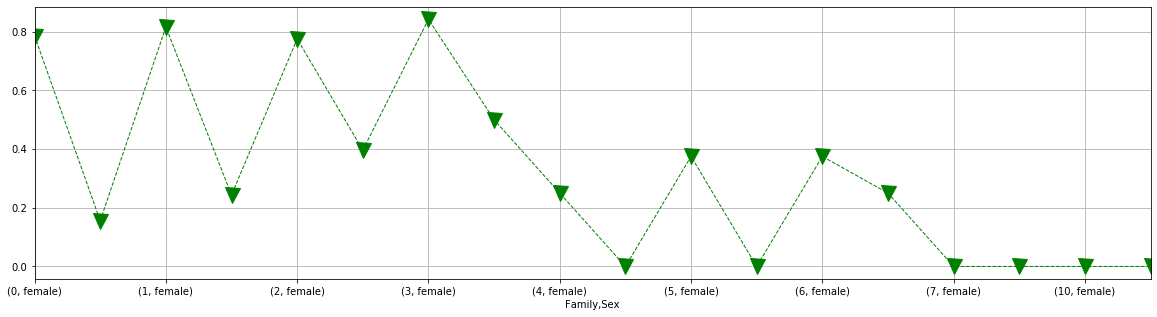

In [166]:
series = data.groupby(['Family', 'Sex'])['Survived'].sum() / data.groupby(['Family', 'Sex'])['Survived'].count()
series.plot(figsize=(20, 5), linestyle='--', marker='v', markersize=15, grid=True, lw = 1, color = 'green')

In [ ]:
#Не знаю, как сделать отбор в groupby (типа sex == female)

Можно понять, что одиноких женщин спасали больше, в отличие от мужчин, пусть даже и женатых. В семьях, где один ребенок ил идвое женщины спасались, старались спасти и мужчин. 